## Import libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [ ]:
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd + "/../")

In [6]:
# Streamlit Calculator imports
from streamlit_sample_size_calculator import (
    sample_size_comparing_two_means,
    sample_size_comparing_two_proportions,
    sample_size_estimating_mean,
    sample_size_estimating_proportion,
)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Parameters

In [15]:
# Parameters for Monte Carlo explicitly set for 25 experiments each, so 100 in total
n_experiments_per_formula = 25

# Z-values clearly defined
confidence_levels = [0.90, 0.95, 0.99]
power_levels = [0.80, 0.85, 0.90, 0.95]
alpha_values = [1 - cl for cl in confidence_levels]

# Explicitly creating randomized combinations of parameters
np.random.seed(42)  # Ensuring reproducibility clearly

## Instructions for G*Power

Scenario 1: `Comparing Two Means` (50 explicit tests)
* Test family: t tests
* Statistical test: Means: Difference between two independent means (two groups)
* Type of power analysis: Choose explicitly A priori: Compute required sample size
* Input Parameters explicitly:
    * Tail(s): Select explicitly Two
    * Effect size d: Use explicitly delta / standard deviation
    * α err prob (alpha): Your selected alpha explicitly (e.g., 0.05)
    * Power (1-β): Your chosen power explicitly (e.g., 0.80)
    * Allocation ratio: Keep explicitly at 1 (equal groups)
* Click: Calculate
* Record explicitly: Sample size per group from G*Power (n per group).

Scenario 2: `Comparing Two Proportions` (50 explicit tests)
* Test family: z tests
* Statistical test: Proportions: Difference between two independent proportions
* Type of power analysis: Explicitly choose A priori: Compute required sample size
* Input Parameters explicitly:
    * Tail(s): Select explicitly Two
    * Proportion p1: Your chosen proportion explicitly (control group)
    * Proportion p2: Your chosen proportion explicitly (treatment group)
    * α err prob (alpha): Explicitly your selected alpha
    * Power (1-β): Explicitly your selected power
    * Allocation ratio: Explicitly set at 1
* Click: Calculate
* Record explicitly: Sample size per group from G*Power.


## `Streamlit Sample Size Calculator` vs. `G*Power`
* https://docs.google.com/spreadsheets/d/1NTKAqNFBTzeeGbg85mMGxNE7aqL-NfL82EsxMljxKrk/edit?gid=0#gid=0

In [20]:
tests = []

# Scenario 1: Comparing Two Means (A/B)
for _ in range(n_experiments_per_formula):
    variance = np.random.uniform(50, 500)
    delta = np.random.uniform(0.1, 10)
    alpha = np.random.choice(alpha_values)
    power = np.random.choice(power_levels)
    std_dev = np.sqrt(variance)
    effect_size_d = delta / std_dev
    z_alpha = norm.ppf(1 - alpha / 2)
    z_beta = norm.ppf(power)
    user_n = sample_size_comparing_two_means(variance, z_alpha, z_beta, delta)
    tests.append({
        'Scenario': 'Two Means (A/B)',
        'Variance': round(variance, 3),
        'Delta': round(delta, 3),
        'Std_Deviation': round(std_dev, 3),
        'Effect_Size_d': round(effect_size_d, 4),
        'Effect_Size_h': '',
        'Alpha': round(alpha, 3),
        'Power': power,
        'p1': '',
        'p2': '',
        'Proportion (p)': '',
        'Margin_of_Error': '',
        'User_n': user_n,
        'GPower_n': '',
        'Difference': ''
    })

# Scenario 2: Comparing Two Proportions (A/B)
for _ in range(n_experiments_per_formula):
    p1 = np.random.uniform(0.01, 0.5)
    p2 = min(p1 + np.random.uniform(0.01, 0.3), 0.99)
    alpha = np.random.choice(alpha_values)
    power = np.random.choice(power_levels)
    effect_size_h = 2 * (np.arcsin(np.sqrt(p2)) - np.arcsin(np.sqrt(p1)))
    z_alpha = norm.ppf(1 - alpha / 2)
    z_beta = norm.ppf(power)
    user_n = sample_size_comparing_two_proportions(p1, p2, z_alpha, z_beta)
    tests.append({
        'Scenario': 'Two Proportions (A/B)',
        'Variance': '',
        'Delta': '',
        'Std_Deviation': '',
        'Effect_Size_d': '',
        'Effect_Size_h': round(effect_size_h, 4),
        'Alpha': round(alpha, 3),
        'Power': power,
        'p1': round(p1, 4),
        'p2': round(p2, 4),
        'Proportion (p)': '',
        'Margin_of_Error': '',
        'User_n': user_n,
        'GPower_n': '',
        'Difference': ''
    })

# Scenario 3: Single Mean Estimation
for _ in range(n_experiments_per_formula):
    variance = np.random.uniform(50, 500)
    margin_of_error = np.random.uniform(0.1, 10)
    alpha = np.random.choice(alpha_values)
    std_dev = np.sqrt(variance)
    effect_size_d = margin_of_error / std_dev
    z_alpha = norm.ppf(1 - alpha / 2)
    user_n = sample_size_estimating_mean(variance, z_alpha, margin_of_error)
    tests.append({
        'Scenario': 'Single Mean',
        'Variance': round(variance, 3),
        'Delta': '',
        'Std_Deviation': round(std_dev, 3),
        'Effect_Size_d': '',
        'Effect_Size_d': round(effect_size_d, 4),
        'Alpha': round(alpha, 3),
        'Power': '',
        'p1': '',
        'p2': '',
        'Proportion (p)': '',
        'Margin_of_Error': round(margin_of_error, 3),
        'User_n': user_n,
        'GPower_n': '',
        'Difference': ''
    })

# Scenario 4: Single Proportion Estimation
for _ in range(n_experiments_per_formula):
    p = np.random.uniform(0.01, 0.5)
    margin_of_error = np.random.uniform(0.01, 0.1)
    alpha = np.random.choice(alpha_values)
    target_p = min(p + margin_of_error, 0.99)
    effect_size_h = 2 * (np.arcsin(np.sqrt(target_p)) - np.arcsin(np.sqrt(p)))
    z_alpha = norm.ppf(1 - alpha / 2)
    user_n = sample_size_estimating_proportion(p, z_alpha, margin_of_error)
    tests.append({
        'Scenario': 'Single Proportion',
        'Variance': '',
        'Delta': '',
        'Std_Deviation': '',
        'Effect_Size_d': '',
        'Effect_Size_h': round(effect_size_h, 4),
        'Alpha': round(alpha, 3),
        'Power': '',
        'p1': '',
        'p2': '',
        'Proportion (p)': round(p, 4),
        'Margin_of_Error': round(margin_of_error, 4),
        'User_n': user_n,
        'GPower_n': '',
        'Difference': ''
    })

# Create DataFrame and save to CSV
df_tests = pd.DataFrame(tests)

In [21]:
df_tests

,Scenario,Variance,Delta,Std_Deviation,Effect_Size_d,Effect_Size_h,Alpha,Power,p1,p2,Proportion (p),Margin_of_Error,User_n,GPower_n,Difference
0,Two Means (A/B),487.9,6.059,22.088,0.2743,,0.01,0.9,,,,,396,,
1,Two Means (A/B),419.806,3.516,20.489,0.1716,,0.05,0.8,,,,,533,,
2,Two Means (A/B),64.312,5.532,8.019,0.6899,,0.10,0.8,,,,,26,,
3,Two Means (A/B),210.196,8.953,14.498,0.6175,,0.10,0.85,,,,,38,,
4,Two Means (A/B),198.545,3.284,14.091,0.233,,0.05,0.8,,,,,290,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Single Proportion,,,,,0.2285,0.10,,,,0.0865,0.0744,39,,
96,Single Proportion,,,,,0.14,0.01,,,,0.2099,0.0597,310,,
97,Single Proportion,,,,,0.1941,0.10,,,,0.1232,0.0705,59,,
98,Single Proportion,,,,,0.0868,0.10,,,,0.3016,0.0405,347,,


In [22]:
# Save explicitly to CSV for importing into Google Sheets
df_tests.to_csv('data/gpower_test_parameters.csv', index=False)

## Scenario 3 and 4 are not possible on G*Power calculator, so we'll draw another 25 from scenario 1 and from scenario 2

## Parameters

In [23]:
# Ensure reproducibility explicitly with different seed
np.random.seed(2024)

# Parameters explicitly defined
n_additional_tests_per_scenario = 25
confidence_levels = [0.90, 0.95, 0.99]
power_levels = [0.80, 0.85, 0.90, 0.95]
alpha_values = [1 - cl for cl in confidence_levels]

## `Streamlit Sample Size Calculator` vs. `G*Power` part 2
* https://docs.google.com/spreadsheets/d/1NTKAqNFBTzeeGbg85mMGxNE7aqL-NfL82EsxMljxKrk/edit?gid=0#gid=0

In [24]:
additional_tests = []

# Additional draws for Scenario 1: Comparing Two Means (A/B)
for _ in range(n_additional_tests_per_scenario):
    variance = np.random.uniform(50, 500)
    delta = np.random.uniform(0.1, 10)
    alpha = np.random.choice(alpha_values)
    power = np.random.choice(power_levels)
    std_dev = np.sqrt(variance)
    effect_size_d = delta / std_dev
    z_alpha = norm.ppf(1 - alpha / 2)
    z_beta = norm.ppf(power)
    user_n = sample_size_comparing_two_means(variance, z_alpha, z_beta, delta)
    additional_tests.append({
        'Scenario': 'Two Means (A/B)',
        'Variance': round(variance, 3),
        'Delta': round(delta, 3),
        'Std_Deviation': round(std_dev, 3),
        'Effect_Size_d': round(effect_size_d, 4),
        'Effect_Size_h': '',
        'Alpha': round(alpha, 3),
        'Power': power,
        'p1': '',
        'p2': '',
        'Proportion (p)': '',
        'Margin_of_Error': '',
        'User_n': user_n,
        'GPower_n': '',
        'Difference': ''
    })

# Additional draws for Scenario 2: Comparing Two Proportions (A/B)
for _ in range(n_additional_tests_per_scenario):
    p1 = np.random.uniform(0.01, 0.5)
    p2 = min(p1 + np.random.uniform(0.01, 0.3), 0.99)
    alpha = np.random.choice(alpha_values)
    power = np.random.choice(power_levels)
    effect_size_h = 2 * (np.arcsin(np.sqrt(p2)) - np.arcsin(np.sqrt(p1)))
    z_alpha = norm.ppf(1 - alpha / 2)
    z_beta = norm.ppf(power)
    user_n = sample_size_comparing_two_proportions(p1, p2, z_alpha, z_beta)
    additional_tests.append({
        'Scenario': 'Two Proportions (A/B)',
        'Variance': '',
        'Delta': '',
        'Std_Deviation': '',
        'Effect_Size_d': '',
        'Effect_Size_h': round(effect_size_h, 4),
        'Alpha': round(alpha, 3),
        'Power': power,
        'p1': round(p1, 4),
        'p2': round(p2, 4),
        'Proportion (p)': '',
        'Margin_of_Error': '',
        'User_n': user_n,
        'GPower_n': '',
        'Difference': ''
    })

# Create DataFrame explicitly for these additional tests
additional_df_tests = pd.DataFrame(additional_tests)

In [25]:
additional_df_tests

,Scenario,Variance,Delta,Std_Deviation,Effect_Size_d,Effect_Size_h,Alpha,Power,p1,p2,Proportion (p),Margin_of_Error,User_n,GPower_n,Difference
0,Two Means (A/B),314.607,7.021,17.737,0.3958,,0.10,0.90,,,,,110,,
1,Two Means (A/B),451.871,9.874,21.257,0.4645,,0.10,0.95,,,,,101,,
2,Two Means (A/B),408.074,6.729,20.201,0.3331,,0.10,0.85,,,,,130,,
3,Two Means (A/B),65.135,1.411,8.071,0.1749,,0.01,0.95,,,,,1166,,
4,Two Means (A/B),114.166,9.992,10.685,0.9352,,0.01,0.90,,,,,35,,
5,Two Means (A/B),252.118,2.331,15.878,0.1468,,0.10,0.90,,,,,795,,
6,Two Means (A/B),381.095,2.654,19.522,0.136,,0.01,0.95,,,,,1928,,
7,Two Means (A/B),482.409,2.592,21.964,0.118,,0.01,0.80,,,,,1677,,
8,Two Means (A/B),395.714,7.999,19.893,0.4021,,0.10,0.90,,,,,106,,
9,Two Means (A/B),222.218,3.878,14.907,0.2602,,0.01,0.95,,,,,527,,


In [27]:
additional_df_tests.to_csv('data/gpower_test_parameters_additional.csv', index=False)

## Visualize it

In [29]:
df_viz = pd.read_csv('data/Monte-Carlo-Experiment-Results-G_Power.csv')

In [30]:
df_viz.head()

,Scenario,Variance,Delta,Std_Deviation,Effect_Size_d,Effect_Size_h,Alpha,Power,p1,p2,Proportion (p),Margin_of_Error,User_n,GPower_n,Difference,rel_diff,part
0,Two Means (A/B),487.900,6.059,22.088,0.2743,NaN,0.01,0.90,NaN,NaN,NaN,NaN,396,398,2,0.01,part 1
1,Two Means (A/B),419.806,3.516,20.489,0.1716,NaN,0.05,0.80,NaN,NaN,NaN,NaN,533,535,2,0.00,part 1
2,Two Means (A/B),64.312,5.532,8.019,0.6899,NaN,0.10,0.80,NaN,NaN,NaN,NaN,26,27,1,0.04,part 1
3,Two Means (A/B),210.196,8.953,14.498,0.6175,NaN,0.10,0.85,NaN,NaN,NaN,NaN,38,39,1,0.03,part 1
4,Two Means (A/B),198.545,3.284,14.091,0.2330,NaN,0.05,0.80,NaN,NaN,NaN,NaN,290,291,1,0.00,part 1


In [36]:
df_viz.tail()

,Scenario,Variance,Delta,Std_Deviation,Effect_Size_d,Effect_Size_h,Alpha,Power,p1,p2,Proportion (p),Margin_of_Error,User_n,GPower_n,Difference,rel_diff,part
95,Two Proportions (A/B),NaN,NaN,NaN,NaN,0.3211,0.10,0.85,0.3544,0.5128,NaN,NaN,138,140,2,0.01,part 2
96,Two Proportions (A/B),NaN,NaN,NaN,NaN,0.1422,0.05,0.80,0.4677,0.5387,NaN,NaN,774,778,4,0.01,part 2
97,Two Proportions (A/B),NaN,NaN,NaN,NaN,0.2426,0.05,0.80,0.4388,0.5598,NaN,NaN,265,267,2,0.01,part 2
98,Two Proportions (A/B),NaN,NaN,NaN,NaN,0.4156,0.05,0.80,0.2712,0.4701,NaN,NaN,89,92,3,0.03,part 2
99,Two Proportions (A/B),NaN,NaN,NaN,NaN,0.3884,0.05,0.90,0.1442,0.3037,NaN,NaN,139,142,3,0.02,part 2


In [ ]:
def plot_rel_difference_distribution(df, col='Rel_difference', formula_col_name='Formula', scenario='Two Means (A/B)', 
                                     use_median=False, compared_with='g_power'):
    df = df.copy()
    df = df[df[formula_col_name] == scenario]
    plt.figure(figsize=(6, 4))

    # Plotting histogram with KDE explicitly
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)

    if use_median:
        # Compute median and interquartile ranges explicitly
        median = df[col].median()
        pct25 = df[col].quantile(0.25)
        pct75 = df[col].quantile(0.75)

        # Add vertical lines explicitly for median and percentiles
        plt.axvline(median, color='red', linestyle='-', linewidth=2, label=f'Median: {median:.4f}')
        plt.axvline(pct25, color='green', linestyle='--', linewidth=1.5, label=f'25th pct: {pct25:.4f}')
        plt.axvline(pct75, color='green', linestyle='--', linewidth=1.5, label=f'75th pct: {pct75:.4f}')
        
        plt.title(f'Distribution of {col} ({scenario}) [Median & IQR]', fontsize=14)
    else:
        # Compute mean and std deviation explicitly
        mean = df[col].mean()
        std = df[col].std()

        # Normal distribution explicitly
        xmin, xmax = df[col].min(), df[col].max()
        x = np.linspace(xmin, xmax, 100)
        p = np.exp(-0.5*((x - mean)/std)**2) / (std * np.sqrt(2 * np.pi))
        plt.plot(x, p * len(df[col]) * (xmax - xmin) / 30, 'r--', linewidth=2, label='Normal Fit')

        # Add vertical lines explicitly for mean and std dev
        plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean:.4f}')
        plt.axvline(mean + std, color='green', linestyle='--', linewidth=1.5, label=f'+1 Std Dev: {mean + std:.4f}')
        plt.axvline(mean - std, color='green', linestyle='--', linewidth=1.5, label=f'-1 Std Dev: {mean - std:.4f}')
        
        plt.title(f'Distribution of {col} ({scenario}) [Mean & Std Dev]', fontsize=14)

    # Common labels and formatting explicitly
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    sns.despine(trim=True, offset=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f"docs/{compared_with}-{col}_distribution.png", dpi=300)
    plt.show()

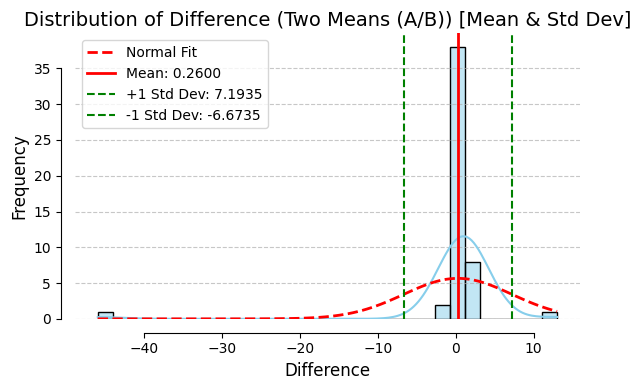

In [ ]:
plot_rel_difference_distribution(df_viz, col='Difference', formula_col_name='Scenario', scenario='Two Means (A/B)', use_median=False, 
                                 compared_with='g_power')

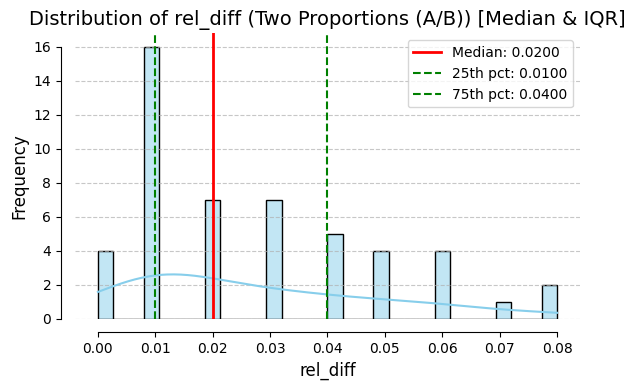

In [ ]:
plot_rel_difference_distribution(df_viz, col='rel_diff', formula_col_name='Scenario', scenario='Two Proportions (A/B)', use_median=True,
                                 compared_with='g_power')